## Modeling Infectious Diseases

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math as mt
import scipy.optimize
from scipy.integrate import odeint
from scipy.optimize import brentq


import seaborn as sns
sns.set_style("darkgrid")

## Reproducing Figure 2.1

In [2]:
#set up for given functions

def SIR(y,t,beta,gama):
  S, I, R = y
  
  dS_dt = -beta*S*I
  dI_dt = beta*S*I - gama*I
  dR_dt = gama*I
  
  return ([dS_dt, dI_dt, dR_dt])  

In [3]:
#Generating the ODE (Assume pop size of 100000)
S0 = 0.999999
I0 = 1 - S0
R0 = 0.0
beta = 1.428
gama = 0.143

#scaling 
W = 10
D = 7*W
n = 1000
pop = 100000
t = np.linspace(0, D, n+1)

#ode
solution = odeint(SIR, ( (pop-1)/pop, 1/pop, 0), t, (beta, gama) )

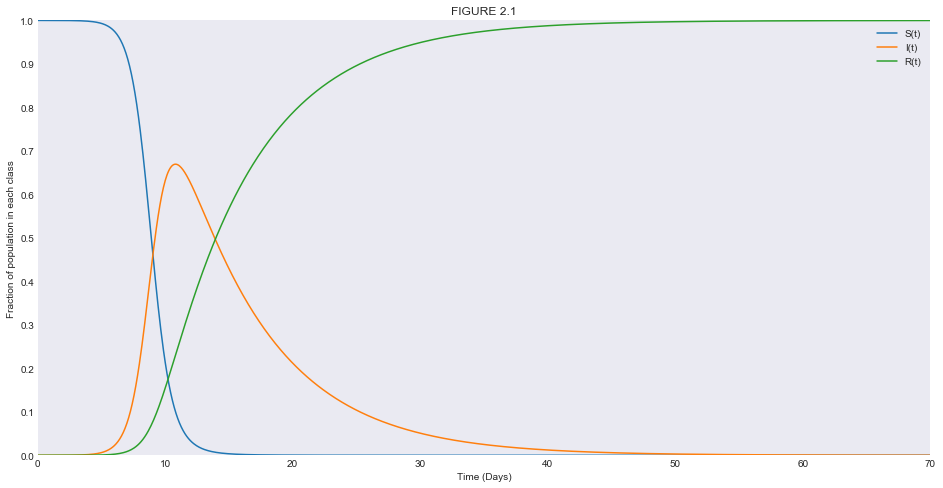

In [4]:
#Plotting graph
plt.figure(figsize=[16,8])
plt.plot(t,solution[:,0], label="S(t)")
plt.plot(t,solution[:,1], label= "I(t)")
plt.plot(t,solution[:,2], label="R(t)")
plt.grid()
plt.legend()
plt.title("FIGURE 2.1")
plt.xlabel("Time (Days)")
plt.ylabel("Fraction of population in each class")
plt.xlim([0,70])
plt.ylim([0,1])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

## Reproducing Figure 2.2

In [5]:
#Set up of function to find the roots of ODE

def findRoot (x, a, b,):
 return 1 - x - a*mt.exp(-x*b) 

#SO Assume = 1 
a = 1

#R0 
bValues = np.linspace(1.001, 5)

#Ro
x = .999999

rootValues = [brentq(findRoot, 0, 50, args=(x,b)) for b in bValues]


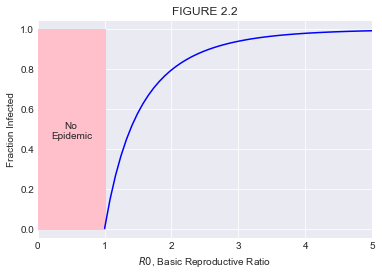

In [6]:
import matplotlib.patches as patches
ax = plt.figure().add_subplot(111)

#adding rectagle 
ax.plot(bValues, rootValues, "blue")
ax.add_patch(patches.Rectangle((0,0),1, 1, color="pink"))

#plotting graph
ax.set_xlabel("$R0$, Basic Reproductive Ratio ")
ax.set_ylabel("Fraction Infected")
ax.set_xlim(0,5)
plt.title("FIGURE 2.2")
ax.text(0.4, 0.5, "No")
ax.text(0.2, 0.45, "Epidemic")
plt.show()

## Reproducing Figure 2.3

In [7]:
#Importing csv file

data = np.genfromtxt("bombay_plague_deaths.csv", delimiter=',', skip_header=True)

deaths = data[:,1]

#set up of simplified function
def func(x):
  y = deaths[10:40]
  w = np.array(range(len(y)))
  a, scale, offset = x
  
  return a*1/np.cosh(scale*(w - offset))**2 - y

res = scipy.optimize.leastsq(func, (850, 0.2, 17))
res

(array([  8.74763599e+02,   1.93597528e-01,   1.74182687e+01]), 1)

In [8]:
#Generating fit curve
y = deaths[10:40]
w = np.array(range(len(y)))

fit_paper = 890*1/np.cosh(0.2*(w - 17))**2

a, b, c = res[0]
scipy_fit = res[0][0]*1/np.cosh(res[0][1]*(w - res[0][2]))**2


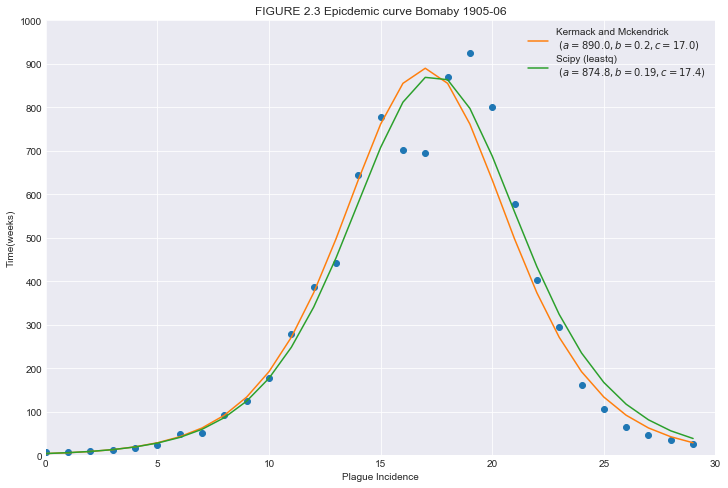

In [9]:
#Plotting graph
plt.figure(figsize=[12,8])
plt.plot(y, "o")
plt.plot(fit_paper, label = "Kermack and Mckendrick\n $(a=%.1f, b=%.1f, c=%.1f)$" % (890, 0.2, 17))
plt.plot(scipy_fit, label = "Scipy (leastq)\n $ (a=%.1f, b=%.2f, c=%.1f)$" % (a, b, c))
plt.legend()
plt.xlabel("Plague Incidence")
plt.ylabel( "Time(weeks)")
plt.title("FIGURE 2.3 Epicdemic curve Bomaby 1905-06")
plt.xlim(0,30)
plt.ylim(0, 1000)
plt.yticks(range(0,1100,100))
plt.show()

## Reproducing Figure 2.4

In [10]:
data=np.genfromtxt('Influenza_in_a_boarding_school.csv', delimiter=',', skip_header=True)

#Setting given parameters
beta = 1.66
gamma = 1/2.2
data=data[:,1]
pop=763
ic=np.array([(pop-3)/pop,3/pop, 0])
T=len(data)-1
n=100
tValues=np.linspace(0,T,n*T+1)

#set up of ODE
def evolution(ic,t,beta,gamma):
    return odeint(rhs, ic, t, (beta,gamma))

def rhs(u,t,beta,gamma):
    S,I,R = u
    return np.array([-beta*S*I, beta*S*I-gamma*I,gamma*I])

#Using given parameters to generate ODE
beta = 1.66
gamma = 1/2.2
paper = evolution(ic,tValues,beta,gamma)

# x used to represent beta/gama because function will be called in scipy.optimize.leastsq which only expects one variable 
def opt_func(x):
    pop
    beta,gamma = x
    u = evolution(ic, tValues, beta, gamma)
    return pop*u[::n,1]- data

opt_func(np.array([1.66,1/2.2]))

#Using best fit parameters to generate ODE
fit_parameters = scipy.optimize.leastsq(opt_func, (beta, gamma))
beta,gamma = fit_parameters[0]
fit = evolution(ic,tValues,beta,gamma)

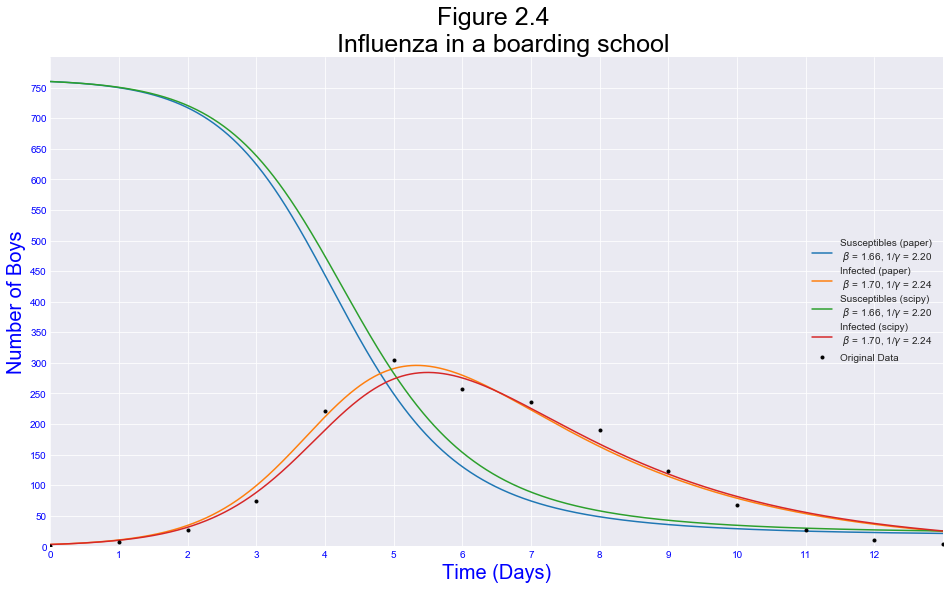

In [11]:
plt.figure(figsize=(16,9))
plt.plot(tValues,pop*fit[:,0], label = "Susceptibles (paper) \n $\\beta$ = 1.66, 1/$\\gamma$ = 2.20")
plt.plot(tValues,pop*fit[:,1], label="Infected (paper) \n $\\beta$ = 1.70, 1/$\\gamma$ = 2.24")
plt.plot(tValues,pop*paper[:,0], label="Susceptibles (scipy) \n $\\beta$ = 1.66, 1/$\\gamma$ = 2.20")
plt.plot(tValues,pop*paper[:,1], label="Infected (scipy) \n $\\beta$ = 1.70, 1/$\\gamma$ = 2.24")
plt.plot(data,'.', color ='black',label="Original Data")
plt.xticks(np.arange(0, 13, 1),size = 10, color = 'b') 
plt.yticks(np.arange(0, 800, 50),size = 10, color = 'b') 
plt.ylabel('Number of Boys', color='b', size=20)
plt.xlabel('Time (Days)', color='b', size=20)
plt.title('Figure 2.4 \n  Influenza in a boarding school', color='k', size=25)
plt.legend(loc=5)
plt.xlim([0,13])
plt.ylim([0,800])
plt.show()